In [61]:
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.api as sm
import george
#import scipy.optimize as op
import math
import emcee
import matplotlib.pyplot as pl
from __future__ import division, print_function
from george import kernels
import triangle
from lmfit import Parameters, minimize, fit_report

In [62]:
xval = np.array([262.5, 283.0, 305.0, 327.5, 351.5, 377.0, 403.5, 431.0, 459.5, 489.0, 519.5, 550.5, 582.5,
                   616.0, 650.5, 686.5, 724.0, 762.5, 802.0, 843.0, 885.5, 929.5, 975.5, 1023.5, 1073.0, 1124.0, 
                   1176.5, 1231.0, 1287.5, 1346.0, 1406.5, 1469.0, 1534.0, 1601.0, 1670.5, 1742.5, 1816.5, 1893.0, 
                   1972.0, 2053.5, 2138.0, 2225.0, 2314.5, 2407.0, 2502.5, 2600.5, 2701.5, 2806.5, 2915.0, 3027.0, 
                   3143.0, 3263.0, 3387.0, 3515.5, 3648.5, 3785.5, 3927.0, 4074.0, 4226.0, 4383.0, 4546.0]) #mjj in GeV

#half the bin width
xerrminus = np.array([9.5, 11.0, 11.0, 11.5, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 15.5, 16.5, 17.0, 17.5, 
                        18.5, 19.0, 19.5, 20.0, 21.0, 21.5, 22.5, 23.5, 24.5, 25.0, 26.0, 26.5, 28.0, 28.5, 30.0, 
                        30.5, 32.0, 33.0, 34.0, 35.5, 36.5, 37.5, 39.0, 40.0, 41.5, 43.0, 44.0, 45.5, 47.0, 48.5,
                        49.5, 51.5, 53.5, 55.0, 57.0, 59.0, 61.0, 63.0, 65.5, 67.5, 69.5, 72.0, 75.0, 77.0, 80.0, 83.0])

#half the bin width
xerrplus = np.array([9.5, 11.0, 11.0, 11.5, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 15.5, 16.5, 17.0, 17.5, 18.5, 
                       19.0, 19.5, 20.0, 21.0, 21.5, 22.5, 23.5, 24.5, 25.0, 26.0, 26.5, 28.0, 28.5, 30.0, 30.5, 32.0, 
                       33.0, 34.0, 35.5, 36.5, 37.5, 39.0, 40.0, 41.5, 43.0, 44.0, 45.5, 47.0, 48.5, 49.5, 51.5, 53.5,
                       55.0, 57.0, 59.0, 61.0, 63.0, 65.5, 67.5, 69.5, 72.0, 75.0, 77.0, 80.0, 83.0])

yval = np.array([4.917897773E8, 3.799410724E8, 2.571684927E8, 1.841859503E8, 1.35935548E8, 9.41937297E7, 
                   6.79501892E7, 4.90487119E7, 3.49414712E7, 2.5617166E7, 1.85988426E7, 1.31836779E7, 1.0136639E7, 
                   7453854.2, 5553447.2, 4264932.3, 3163415.4, 2362702.7, 1775332.4, 1366279.0, 1026756.5, 788737.4,
                   603941.0, 461687.4, 346323.9, 264838.0, 198505.7, 153246.1, 115508.6, 89024.0, 66542.8, 51185.0, 
                   38806.7, 29264.0, 21907.5, 16796.6, 12379.0, 9150.3, 6763.4, 5155.4, 3874.5, 2786.4, 1945.9, 
                   1482.2, 1085.5, 795.8, 538.7, 379.5, 275.1, 174.8, 136.3, 87.5, 59.7, 37.7, 17.0, 20.2, 13.0, 
                   6.7, 4.0, 3.0, 1.0])

yerr = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
#yerrplus = array("f", [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                   #    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                   #    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                   #    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
#numpoints = 61
#p8757_d1x1y1 = ROOT.TGraphAsymmErrors(numpoints, xval, yval, xerrminus, xerrplus, yerrminus, yerrplus)

In [63]:
#all fitting models. First has x bin width included, second is standard for plotting purposes, 
#third is log (gives better fit). Residual is for lmfit

def model1(t, p0, p1, p2, p3, xerr): 
    #p0, p1, p2, p3 = params
    sqrts = 8000.
    return (p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2+p3*np.log(t/sqrts)))*(xerr*2.)

def model2(t, p0, p1, p2, p3): 
    #p0, p1, p2, p3 = params
    sqrts = 8000.
    return (p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2+p3*np.log(t/sqrts)))

def model3(t, p0, p1, p2, p3):
    #p0, p1, p2, p3 = params
    sqrts = 8000.
    return np.log(p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2+p3*np.log(t/sqrts)))

def residual(params, t,data=None): #gaussian distribution
    #p0, p1, p2, p3 = params
    vals = params.valuesdict()
    p0 =  vals['p0']
    p1 =  vals['p1']
    p2 = vals['p2']
    p3 = vals['p3']
    sqrts = 8000.
    return (np.log(p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2+p3*np.log(t/sqrts)))-np.log(data))

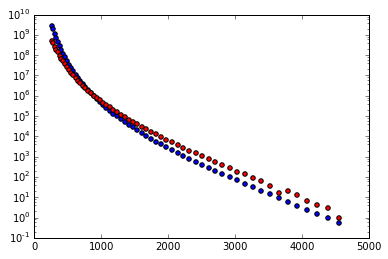

In [64]:
#fit parameters give to me. Fits ok when taking bin width into account

params = (0.0490546530927,7.3087377889,6.00446454843,0.134738604245)
pl.scatter(xval, model1(xval, 0.0490546530927,7.3087377889,-6.00446454843,0.134738604245, xerrplus)) 
#pl.ylim([1, 10e9])
pl.scatter(xval, yval, c='r')
pl.yscale('log')



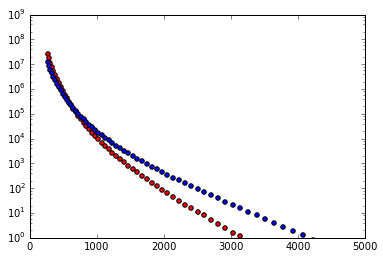

In [65]:
#ignore
newy = yval/(xerrplus+xerrminus)
pl.scatter(xval, newy, c='r')
pl.scatter(xval, model2(xval, 20.0490546530927,7.3087377889,-3.50446454843,0.134738604245)) 
pl.ylim([1, 10e8])

pl.yscale('log')

first fit [0.55765009832017132, 8.6753672190427995, -5.4038968232544793, -0.042639640230075333]
second fit [[Variables]]
    p0:   0.55765045 +/- 0.221877 (39.79%) (init= 0.04905465)
    p1:   8.67536775 +/- 0.346239 (3.99%) (init= 7.308738)
    p2:  -5.40389635 +/- 0.280458 (5.19%) (init=-6.004465)
    p3:  -0.04263955 +/- 0.051870 (121.65%) (init= 0.1347386)
[[Correlations]] (unreported correlations are <  0.100)
    C(p2, p3)                    =  0.993 
    C(p0, p2)                    =  0.993 
    C(p0, p1)                    =  0.988 
    C(p0, p3)                    =  0.974 
    C(p1, p2)                    =  0.967 
    C(p1, p3)                    =  0.937 


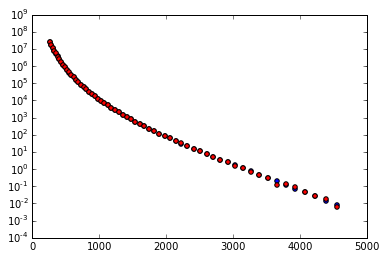

In [66]:
newy = yval/(xerrplus+xerrminus) #scale data by bin width since curve-fit can't have the model take in an argument
#that isn't a fit parameter

#first fit version using curve_fit
fitParams, fitCovariances = curve_fit(model3, xval, np.log(newy), p0=(0.0490546530927,7.3087377889,-6.00446454843,0.134738604245), maxfev=100000)#, diag=(1./xval.mean(),1./yval.mean()))
print("first fit", list(fitParams))
fitps = list(fitParams)

#second fit version using lmfit
fit_params = Parameters()
fit_params.add('p0', value=0.0490546530927)
fit_params.add('p1', value=7.3087377889)
fit_params.add('p2', value=-6.00446454843)
fit_params.add('p3', value=0.1347386042)

out = minimize(residual, fit_params, args=(xval,), kws={'data':newy})

print("second fit", fit_report(fit_params))

#compare first fit results with data
pl.scatter(xval, model2(xval,  fitps[0], fitps[1], fitps[2], fitps[3])) 
pl.scatter(xval, newy, c='r')
pl.ylim([10e-5, 10e8])
pl.yscale('log')


In [67]:
def model(params, t, xbinwidth): 
    p0, p1, p2, p3 = params
    sqrts = 8000.
    return (p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2+p3*np.log(t/sqrts)))*xbinwidth*2.

def lnlike_gp(p, t, y, yerr, xbinwidth):
    return -0.5 * np.sum(((y - model(p, t, xbinwidth))/np.sqrt(model(p,t, xbinwidth))) ** 2) 
    # return p1*math.log(1-t)+(p2+p3*math.log(t)

def lnprior_gp(p):
    p0, p1, p2, p3 = p
    if (0 < p0 < 5 and  0 < p1 < 10 and -10 < p2 < 0 and
            -1 < p3 < 1):
        return 0.0
    return -np.inf


def lnprob_gp(p, x, y, yerr, binwidth): 
    lp = lnprior_gp(p) 
    return lp + lnlike_gp(p, x, y, yerr, binwidth) if np.isfinite(lp) else -np.inf


In [68]:
def fit_gp(initial, data, nwalkers=32):
    ndim = len(initial)
    p0 = [np.array(initial) + 1e-8 * np.random.randn(ndim)
          for i in xrange(nwalkers)]
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_gp, args=data)
    print("Running burn-in")
    p0, lnp, _ = sampler.run_mcmc(p0, 500)
    sampler.reset()

    print("Running second burn-in")
    p = p0[np.argmax(lnp)]
    p0 = [p + 1e-8 * np.random.randn(ndim) for i in xrange(nwalkers)]
    p0, _, _ = sampler.run_mcmc(p0, 500)
    sampler.reset()

    print("Running production")
    p0, _, _ = sampler.run_mcmc(p0, 1000)
    return sampler

Fitting GP
Running burn-in
Running second burn-in
Running production
Making plots


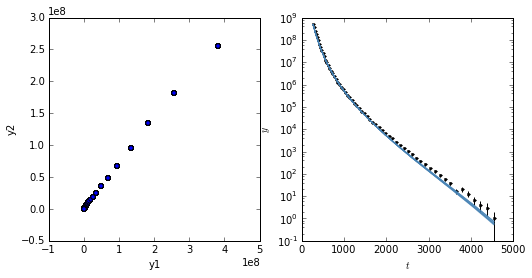

In [73]:
if __name__ == "__main__":
    np.random.seed(1234)
    truth = [0.5576501,  8.67536722, -5.40389682, -0.04263964]
    data = (xval, yval, np.sqrt(yval), xerrplus*2.)
    # Fit assuming GP.
    print("Fitting GP")
    sampler = fit_gp(truth, data)
    # Plot the samples in data space.
    print("Making plots")
    samples = sampler.flatchain
   # x = np.linspace(0, 4500, len(xval))
    pl.figure()
    pl.subplots_adjust(right=1.2)
    pl.subplot(122)
    pl.errorbar(xval, yval, yerr=np.sqrt(yval), fmt=".k", capsize=0)
    for s in samples[np.random.randint(len(samples), size=24)]:
        y1=model(s, xval, xerrplus*2.)[1:-1]
        y2=model(s, xval, xerrplus*2.)[2:]
        pl.subplot(121)
        pl.scatter(y1,y2)
        pl.subplot(122)
        pl.plot(xval, model(s, xval, xerrplus*2.), color="#4682b4", alpha=0.3)
    pl.ylabel(r"$y$")
    pl.xlabel(r"$t$")
   # pl.xlim(0, 4500)
    pl.yscale('log')
    pl.subplot(121)
    pl.xlabel("y1")
    pl.ylabel("y2")
   # pl.savefig("gp-results.png", dpi=150)
